In [3]:
import pandas as pd

# 加载数据
file_path = '../../data/processed/tweets_bushfire_related_keywords.csv'
df = pd.read_csv(file_path)

# 查看数据的前几行
df.head()

,_id,author,parent,quoted,mentions,hashtags,depth,node_type,quote_ancestors,tweet_ancestors,...,deidentname,timebucket,horiz_offset,influence_tweet_factor,left,vert_offset,location,vert_correct,cleaned_text,dominant_topic
0,1134575763334680576,108577207,NaN,1.134424e+18,"['108577207', '21475927', '254515782', '341163...","['ausvotes2019', 'auspol']",0,Root,[],[],...,Scott Morrison,2019-05-31 21:30,0.5,0.477121,False,0.795556,"Tasmania, Australia",True,methinks scottmorrisonmp olofdawson scottjakob...,1
1,1163265539247968256,3112695773,NaN,NaN,"['3112695773', '88593058']",[],0,Root,[],[],...,Christopher Mitchell Henson-Svensson,2019-08-19 01:30,0.5,3.471585,False,0.990000,Unknown,True,koala cut tie alan jones significant buyer med...,3
2,1164479471346257921,2960282202,NaN,NaN,"['3459051', '50393960', '17596622', '155065462...","['amazonfire', 'prayfortheamazon']",0,Root,[],[],...,Hans Moreau,2019-08-22 10:00,0.5,0.301030,True,0.572222,Unknown,True,kindly use pay firefighter jet bombardier cl 1...,5
3,1165088032082604038,2233234848,NaN,NaN,['2233234848'],['amazonfires'],0,Root,[],[],...,Amanda Robert Harding-Stokes,2019-08-24 02:15,0.5,0.477121,False,0.785556,Unknown,True,earth talk human done amazonfires,9
4,1170123597802872834,95802989,NaN,NaN,['95802989'],"['stanthorpe', 'qldfires', 'tenterfield', 'nsw...",0,Root,[],[],...,Janet Dixon,2019-09-06 23:45,0.5,1.946943,True,0.755556,Australia,True,givit supporting service responding bushfire e...,5


In [24]:
df.columns


Index(['_id', 'author', 'parent', 'quoted', 'mentions', 'hashtags', 'depth',
       'node_type', 'quote_ancestors', 'tweet_ancestors', 'children',
       'tree_authors', 'tree_hashtags', 'tree_users', 'author_keynode',
       'hashtag_keynode', 'valid', 'created_at', 'created_at_dt',
       'display_text', 'display_text_range', 'extended_entities',
       'favourite_count', 'lang', 'quote_count', 'reply_count',
       'retweet_count', 'urls', 'text', 'child_nodes', 'influence_tweet',
       'influence_user', 'verified', 'deidentmentions', 'deidentscreenname',
       'deidentname', 'timebucket', 'horiz_offset', 'influence_tweet_factor',
       'left', 'vert_offset', 'location', 'vert_correct', 'cleaned_text',
       'dominant_topic', 'sentiment', 'weighted_sentiment', 'date'],
      dtype='object')

In [8]:
# to json 
location_counts = df['location'].value_counts()
location_unique_count = df['location'].nunique()
df_location = pd.DataFrame(location_counts)
df_location.to_json('../../data/processed/location_counts.json')

Top 10 Locations by Tweet Counts:
location
Unknown                                   62340
Victoria, Australia                       15408
New South Wales, Australia                14884
United States                             13339
Australia                                 13165
                                          ...  
Korea, Democratic People's Republic of        1
Mali                                          1
Greenland                                     1
Angola                                        1
Paraguay                                      1
Name: count, Length: 185, dtype: int64
Unique locations count: 185


/var/folders/sn/vtf5wp8x6vldjnk3w88mk9zr0000gn/T/ipykernel_21146/1317738761.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index[:10], y=location_counts.values[:10], palette='viridis')


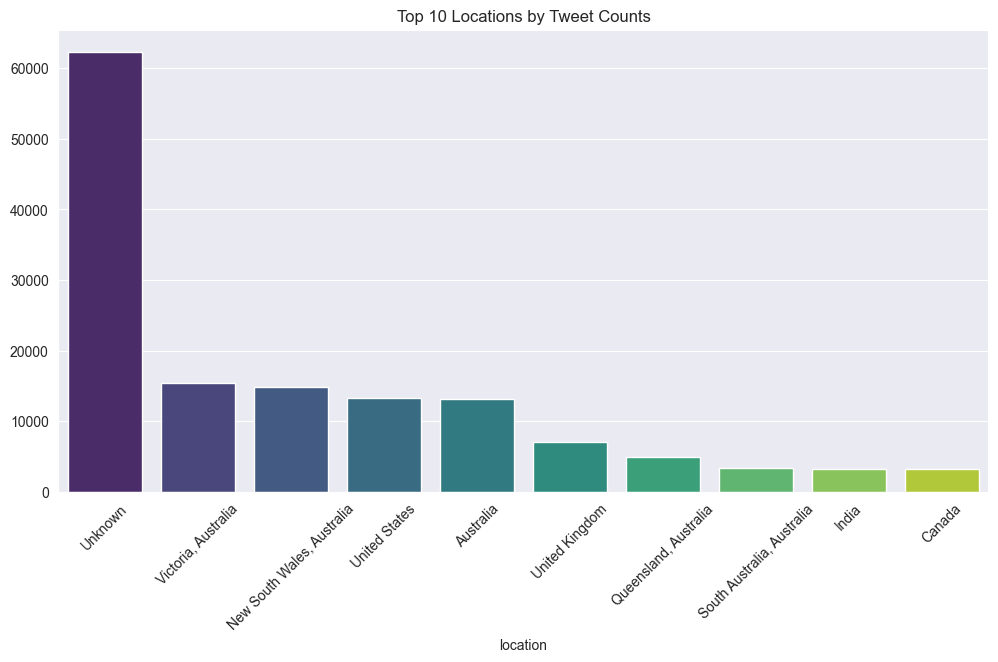

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 位置的分布统计
location_counts = df['location'].value_counts()
location_unique_count = df['location'].nunique()

# 显示位置分布的前10个位置
print("Top 10 Locations by Tweet Counts:")
print(location_counts)
print(f"Unique locations count: {location_unique_count}")

# 可视化 - 位置的分布
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index[:10], y=location_counts.values[:10], palette='viridis')
plt.title('Top 10 Locations by Tweet Counts')
plt.xticks(rotation=45)
plt.show()


<Figure size 1400x700 with 0 Axes>

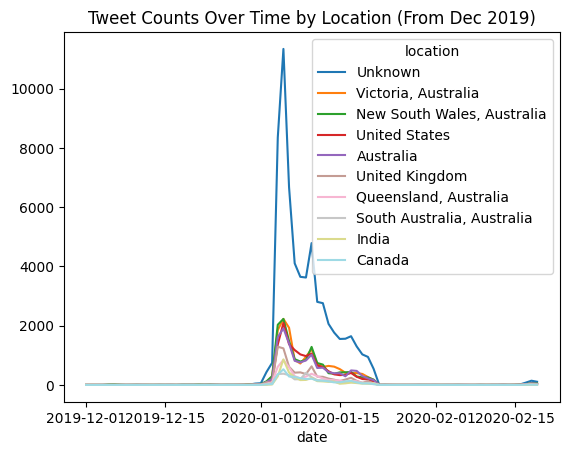

In [31]:
from datetime import datetime

# 2. 时间上的位置分布
df['created_at_dt'] = pd.to_datetime(df['created_at_dt'])
df['date'] = df['created_at_dt'].dt.date
location_time_distribution = df.groupby(['date', 'location']).size().unstack(fill_value=0)

# 过滤时间，只选择2019年12月1日及以后的数据(这样特征更突出)
start_date = datetime(2019, 12, 1).date()
filtered_location_time_distribution = location_time_distribution.loc[start_date:]

# 可视化 - 时间上的位置分布（选取前10个位置）
plt.figure(figsize=(14, 7))
filtered_location_time_distribution[location_counts.index[:10]].plot(kind='line', colormap='tab20', title='Tweet Counts Over Time by Location (From Dec 2019)')
plt.show()


Sentiment Distribution by Top 10 Locations:
Unknown                       0.024477
Victoria, Australia           0.013909
New South Wales, Australia   -0.000328
United States                 0.107535
Australia                     0.029673
United Kingdom                0.069656
Queensland, Australia        -0.039154
South Australia, Australia   -0.072358
India                        -0.054700
Canada                        0.094056
Name: sentiment, dtype: float64


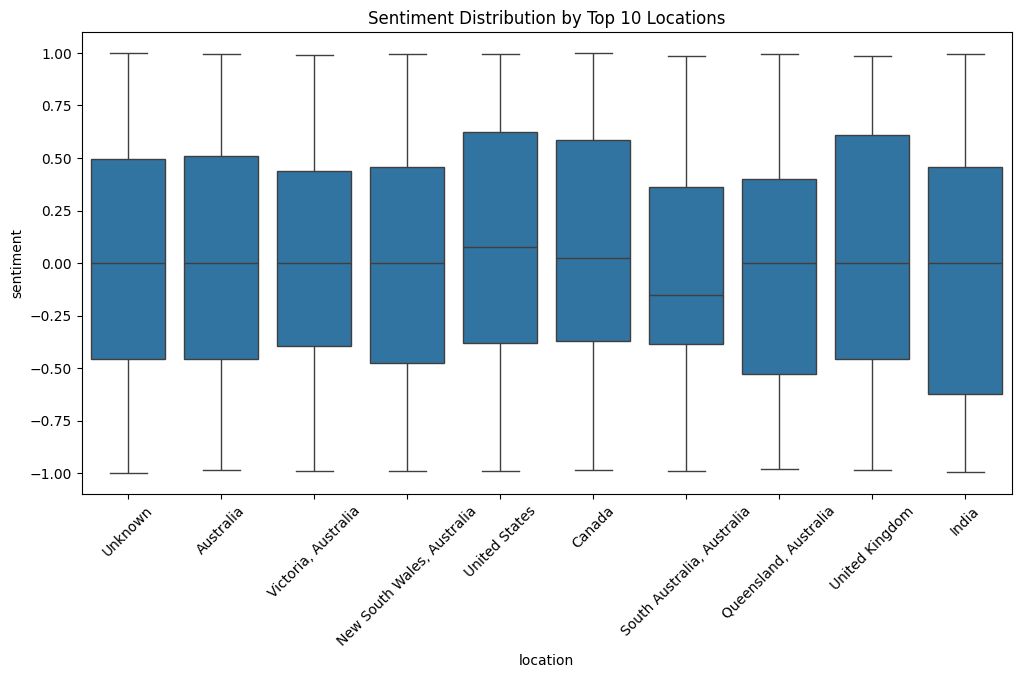

In [32]:
# 3. 情感上的位置分布
if 'sentiment' in df.columns:
    location_sentiment_distribution = df.groupby('location')['sentiment'].mean()
    
    # 选取推文数量最多的前10个位置
    top_locations = location_counts.index[:10]
    top_location_sentiment_distribution = location_sentiment_distribution.loc[top_locations]
    
    print("Sentiment Distribution by Top 10 Locations:")
    print(top_location_sentiment_distribution)
    
    # 可视化 - 情感上的位置分布
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='location', y='sentiment', data=df[df['location'].isin(top_locations)])
    plt.title('Sentiment Distribution by Top 10 Locations')
    plt.xticks(rotation=45)
    plt.show()


Topic Distribution Across Top 10 Locations:
dominant_topic                 0     1      2      3     4      5     6    7  \
Unknown                     3092  7166  14330  11427  1639  10861  3957  599   
Victoria, Australia         1434  2081   1226   2862  1203   2288  2403  231   
New South Wales, Australia   938  2508   1282   3143    42   2137  2771  177   
United States                506   405   3890   1922   255   3685   574   97   
Australia                    735  2171   1397   2931    54   2648  1412  173   
United Kingdom               318   258   1869   1223    85   1932   325   52   
Queensland, Australia        225  1227    446   1310    24    694   420   40   
South Australia, Australia   165   437    322    553     9    408  1073   15   
India                        142    63   1446    374    86    302   122   14   
Canada                       209    80    850    564    38    772   185   23   

dominant_topic                 8     9  
Unknown                     4290  

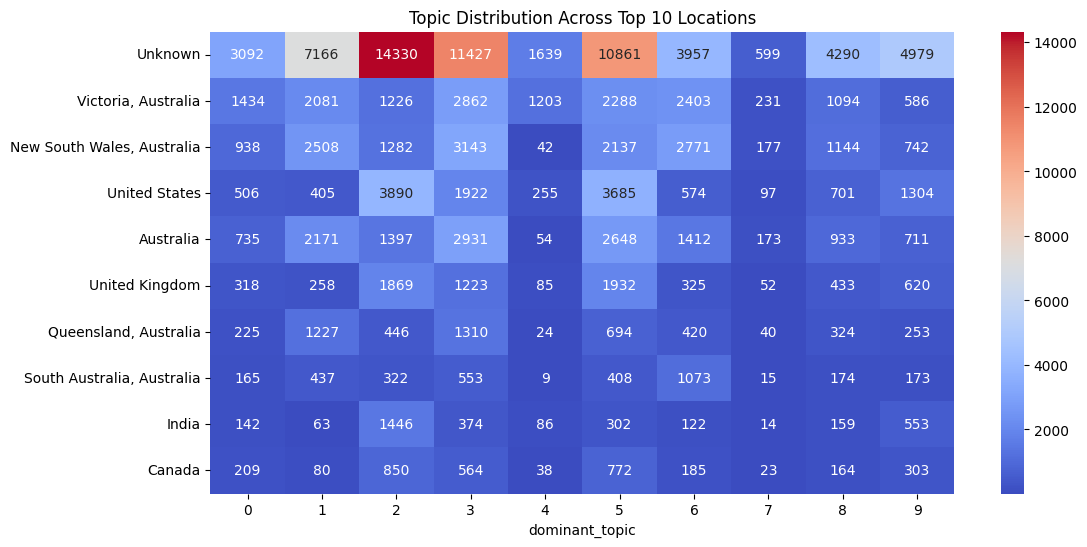

In [25]:
# 4. 地理位置和话题统计
location_topic_distribution = df.groupby(['location', 'dominant_topic']).size().unstack(fill_value=0)
top_locations = location_counts.index[:10]  # 获取推文数量最多的前10个位置
top_location_topic_distribution = location_topic_distribution.loc[top_locations]

print("Topic Distribution Across Top 10 Locations:")
print(top_location_topic_distribution)

# 可视化 - 位置和话题的关系
plt.figure(figsize=(12, 6))
sns.heatmap(top_location_topic_distribution, annot=True, fmt="d", cmap='coolwarm')
plt.title('Topic Distribution Across Top 10 Locations')
plt.show()

Top 10 Locations by Average Retweet Count:
Unknown                       59.556272
Victoria, Australia           32.510190
New South Wales, Australia    50.632155
United States                 94.594872
Australia                     40.979187
United Kingdom                39.864371
Queensland, Australia         10.881322
South Australia, Australia    15.283869
India                         12.674640
Canada                         8.756587
Name: retweet_count, dtype: float64


C:\Users\20529\AppData\Local\Temp\ipykernel_29556\698936365.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_retweet_count.index, y=location_retweet_count.values, palette='magma')


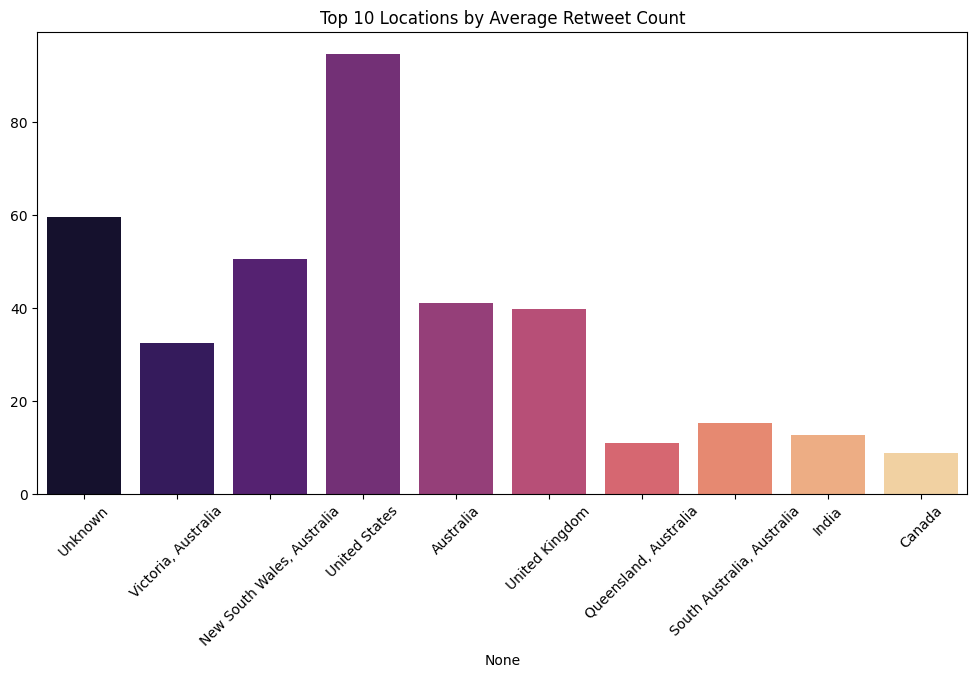

Top 10 Locations by Average Quote Count:
Unknown                       0.264357
Victoria, Australia           0.058541
New South Wales, Australia    0.173340
United States                 0.274009
Australia                     0.360653
United Kingdom                0.090232
Queensland, Australia         0.044933
South Australia, Australia    0.049865
India                         0.032812
Canada                        0.020075
Name: quote_count, dtype: float64


C:\Users\20529\AppData\Local\Temp\ipykernel_29556\698936365.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_quote_count.index, y=location_quote_count.values, palette='magma')


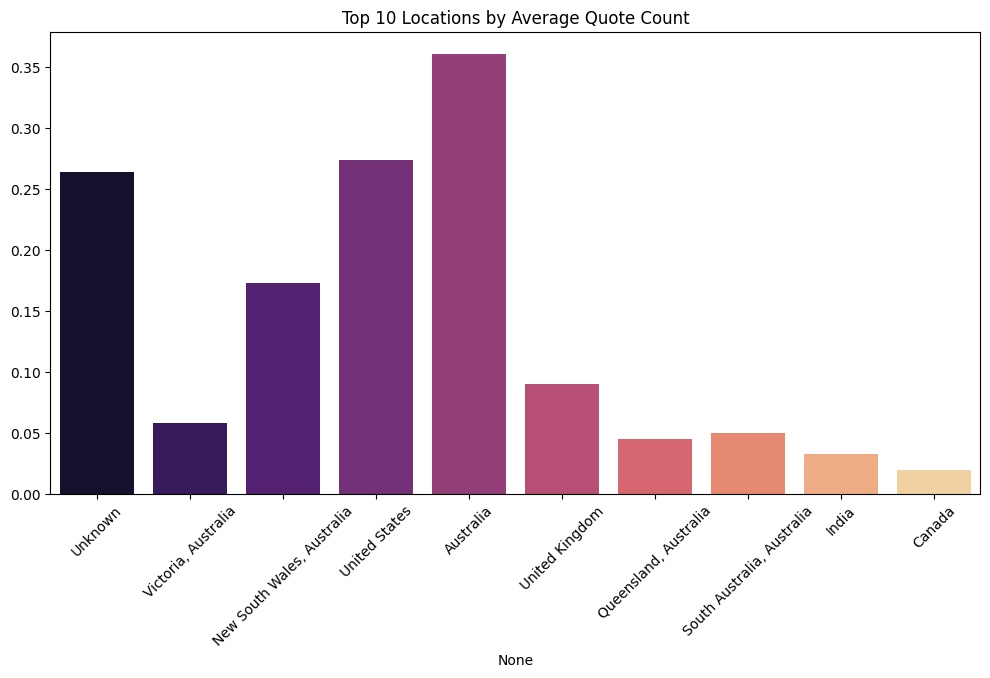

Top 10 Locations by Average Reply Count:
Unknown                       0.199743
Victoria, Australia           0.114810
New South Wales, Australia    0.124832
United States                 0.269136
Australia                     0.133080
United Kingdom                0.102600
Queensland, Australia         0.041507
South Australia, Australia    0.071493
India                         0.082183
Canada                        0.030427
Name: reply_count, dtype: float64


C:\Users\20529\AppData\Local\Temp\ipykernel_29556\698936365.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_reply_count.index, y=location_reply_count.values, palette='magma')


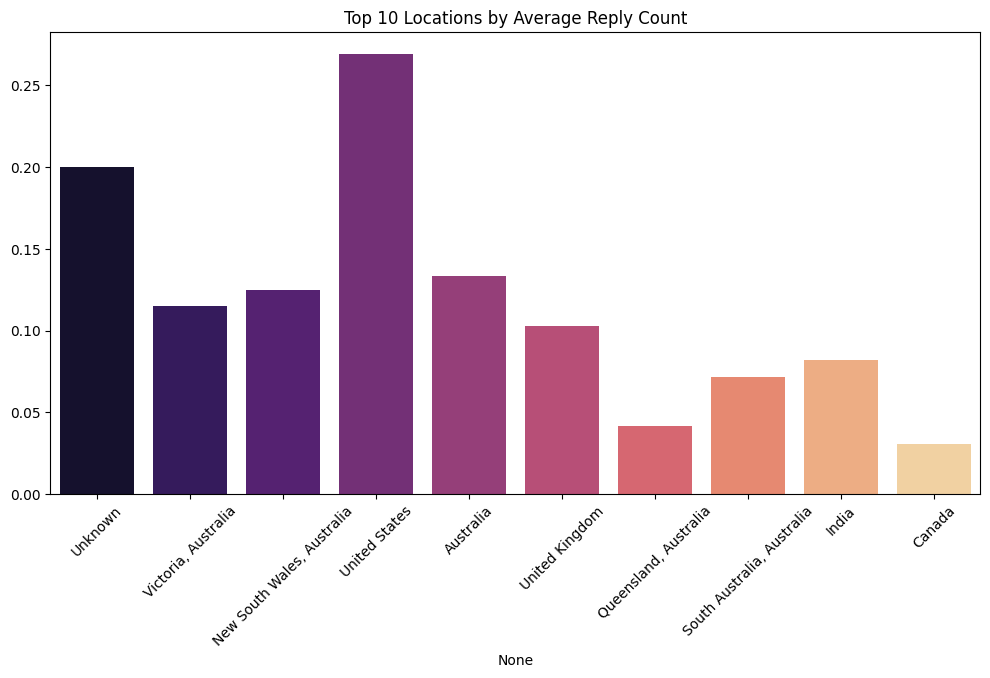

In [34]:
# 5. 地理位置与推文互动统计

# 按照推文数量最多的前10个位置进行排序和过滤
top_locations = location_counts.index[:10]

# 计算前10个位置的推文互动平均值
location_retweet_count = df.groupby('location')['retweet_count'].mean().loc[top_locations]
location_quote_count = df.groupby('location')['quote_count'].mean().loc[top_locations]
location_reply_count = df.groupby('location')['reply_count'].mean().loc[top_locations]

print("Top 10 Locations by Average Retweet Count:")
print(location_retweet_count)

# 可视化 - 地理位置与推文互动统计（转发次数）
plt.figure(figsize=(12, 6))
sns.barplot(x=location_retweet_count.index, y=location_retweet_count.values, palette='magma')
plt.title('Top 10 Locations by Average Retweet Count')
plt.xticks(rotation=45)
plt.show()

print("Top 10 Locations by Average Quote Count:")
print(location_quote_count)

# 可视化 - 地理位置与推文互动统计（引用次数）
plt.figure(figsize=(12, 6))
sns.barplot(x=location_quote_count.index, y=location_quote_count.values, palette='magma')
plt.title('Top 10 Locations by Average Quote Count')
plt.xticks(rotation=45)
plt.show()

print("Top 10 Locations by Average Reply Count:")
print(location_reply_count)

# 可视化 - 地理位置与推文互动统计（回复次数）
plt.figure(figsize=(12, 6))
sns.barplot(x=location_reply_count.index, y=location_reply_count.values, palette='magma')
plt.title('Top 10 Locations by Average Reply Count')
plt.xticks(rotation=45)
plt.show()


Top 10 Locations by Average Tweet Influence Score:
Unknown                        72.826604
Victoria, Australia            41.701811
New South Wales, Australia     75.520021
United States                 118.459817
Australia                      50.974440
United Kingdom                 54.733872
Queensland, Australia          13.769394
South Australia, Australia     20.959447
India                          15.803588
Canada                         10.756587
Name: influence_tweet, dtype: float64


C:\Users\20529\AppData\Local\Temp\ipykernel_29556\1340919777.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_influence_tweet.index, y=location_influence_tweet.values, palette='rocket')


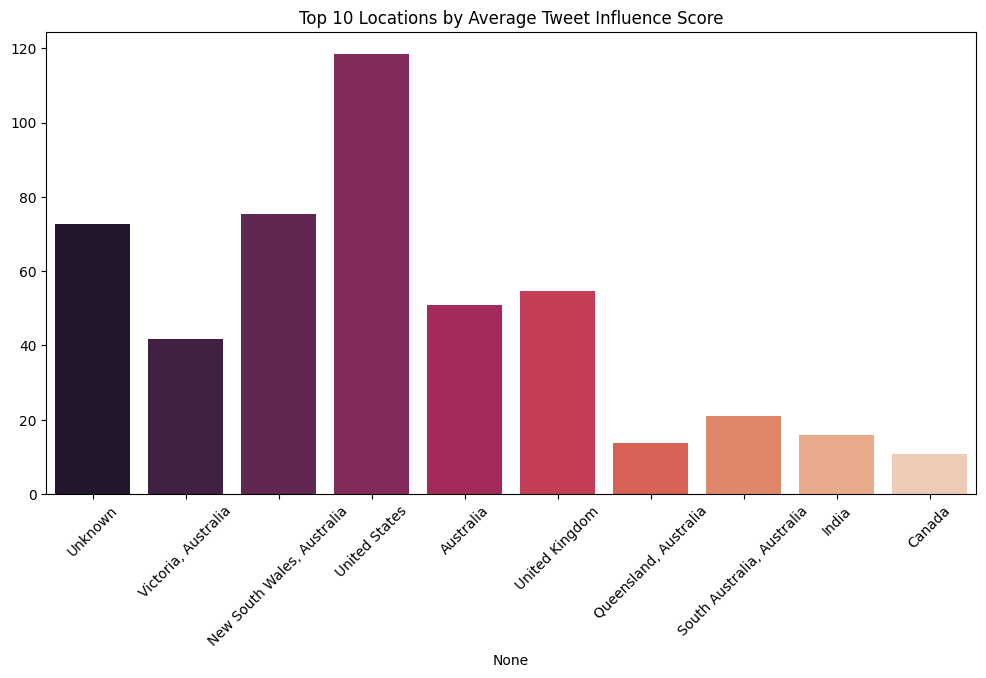

Top 10 Locations by Average User Influence Score:
Unknown                       109665.207395
Victoria, Australia            24239.736403
New South Wales, Australia     39427.029360
United States                 238831.047905
Australia                      37434.907026
United Kingdom                258458.056500
Queensland, Australia           7651.830546
South Australia, Australia     33431.411535
India                         150791.142901
Canada                         23704.536857
Name: influence_user, dtype: float64


C:\Users\20529\AppData\Local\Temp\ipykernel_29556\1340919777.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_influence_user.index, y=location_influence_user.values, palette='rocket')


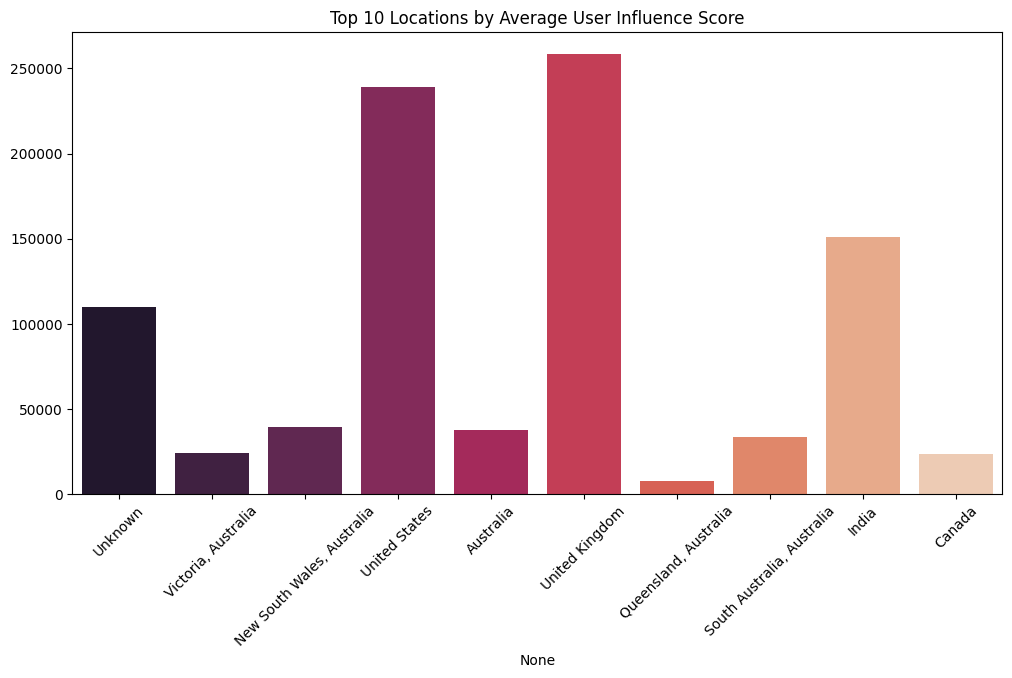

In [36]:
# 6. 与推文影响力相关的统计

# 按照推文数量最多的前10个位置进行排序和过滤
top_locations = location_counts.index[:10]

# 计算前10个位置的推文和用户影响力平均值
location_influence_tweet = df.groupby('location')['influence_tweet'].mean().loc[top_locations]
location_influence_user = df.groupby('location')['influence_user'].mean().loc[top_locations]

print("Top 10 Locations by Average Tweet Influence Score:")
print(location_influence_tweet)

# 可视化 - 推文影响力与位置的关系
plt.figure(figsize=(12, 6))
sns.barplot(x=location_influence_tweet.index, y=location_influence_tweet.values, palette='rocket')
plt.title('Top 10 Locations by Average Tweet Influence Score')
plt.xticks(rotation=45)
plt.show()

print("Top 10 Locations by Average User Influence Score:")
print(location_influence_user)

# 可视化 - 用户影响力与位置的关系
plt.figure(figsize=(12, 6))
sns.barplot(x=location_influence_user.index, y=location_influence_user.values, palette='rocket')
plt.title('Top 10 Locations by Average User Influence Score')
plt.xticks(rotation=45)
plt.show()


C:\Users\20529\AppData\Local\Temp\ipykernel_29556\4240941510.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Hashtag', data=hashtag_df, palette='viridis')


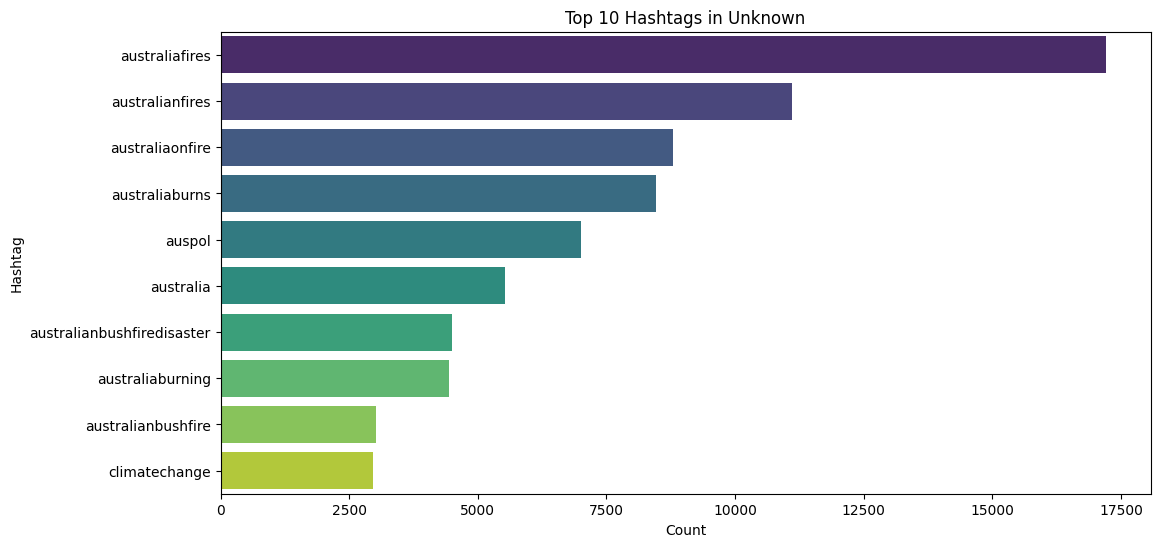

C:\Users\20529\AppData\Local\Temp\ipykernel_29556\4240941510.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Hashtag', data=hashtag_df, palette='viridis')


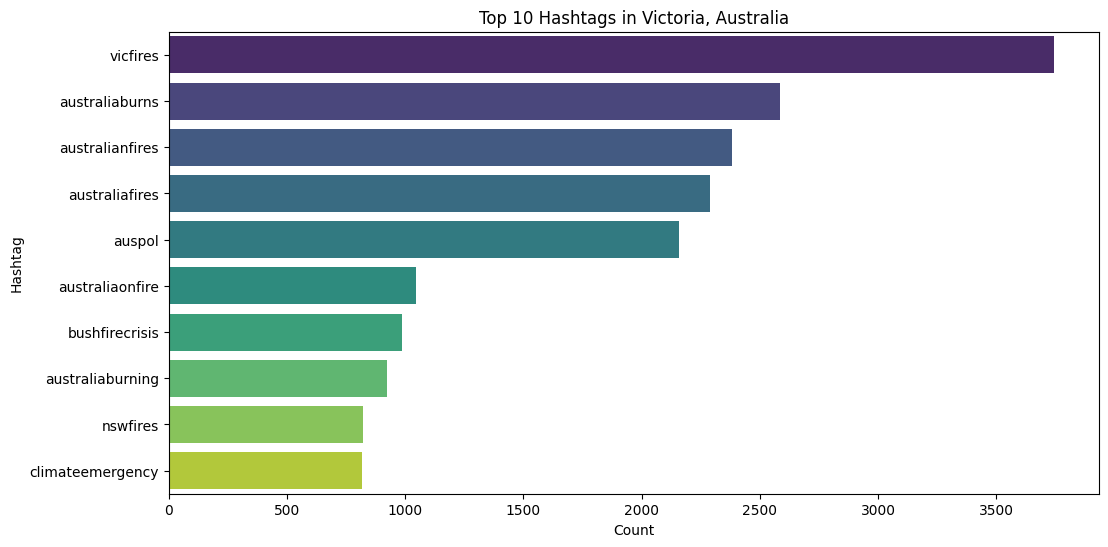

C:\Users\20529\AppData\Local\Temp\ipykernel_29556\4240941510.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Hashtag', data=hashtag_df, palette='viridis')


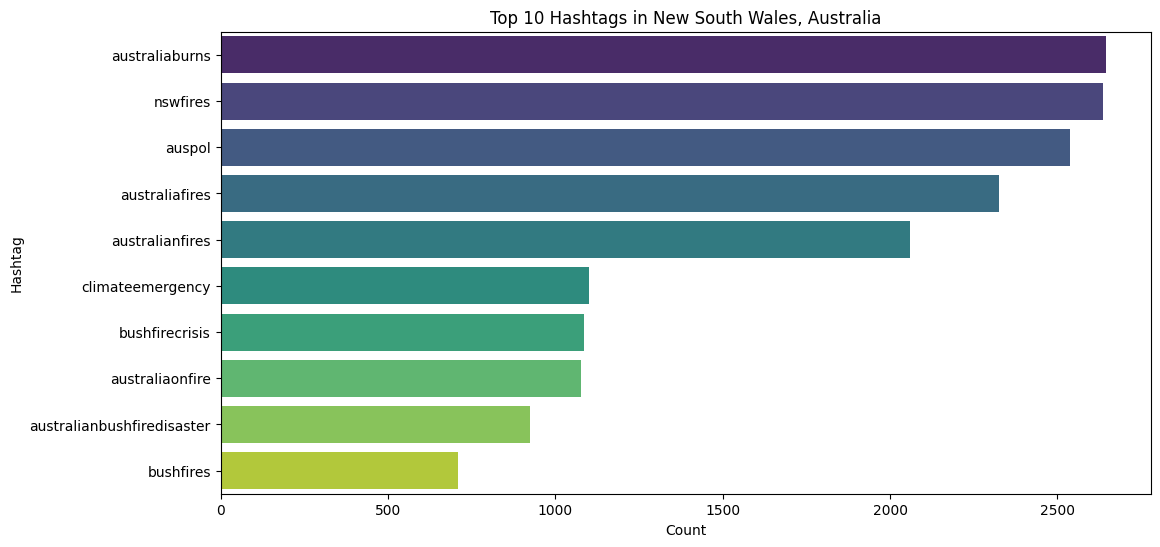

C:\Users\20529\AppData\Local\Temp\ipykernel_29556\4240941510.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Hashtag', data=hashtag_df, palette='viridis')


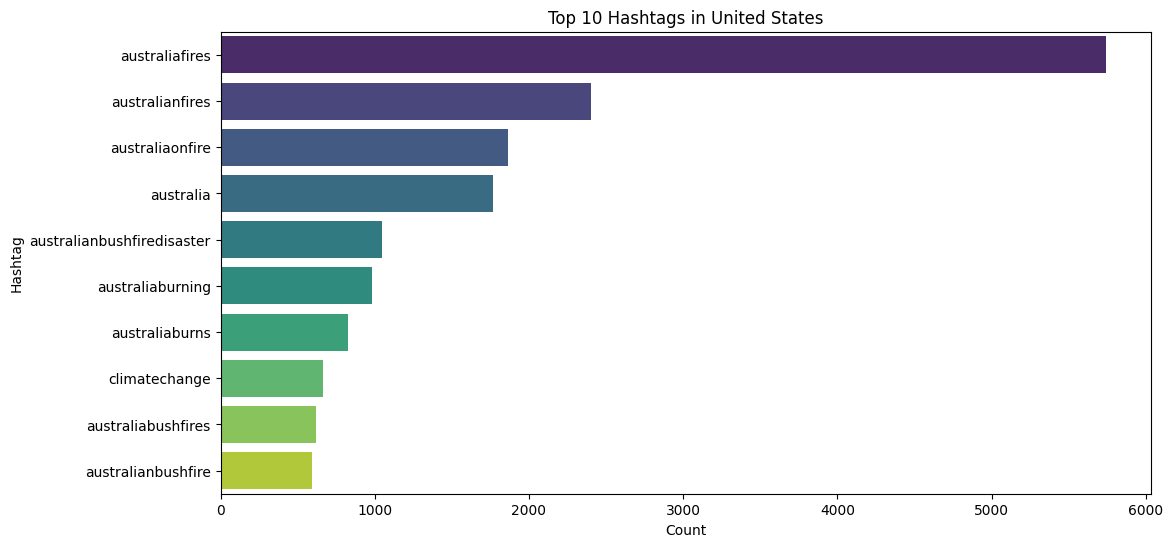

C:\Users\20529\AppData\Local\Temp\ipykernel_29556\4240941510.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Hashtag', data=hashtag_df, palette='viridis')


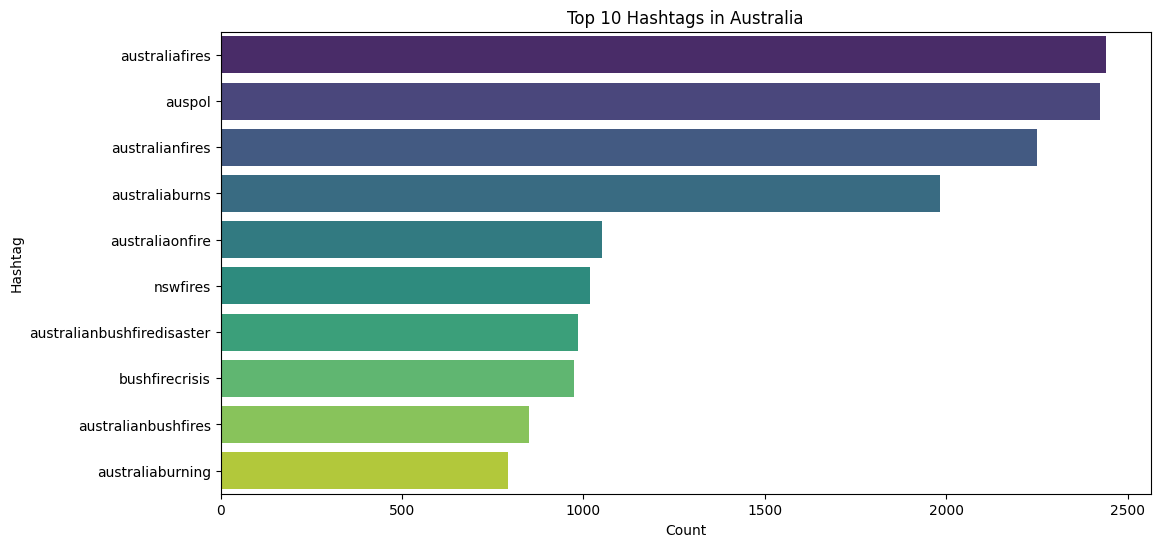

C:\Users\20529\AppData\Local\Temp\ipykernel_29556\4240941510.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Hashtag', data=hashtag_df, palette='viridis')


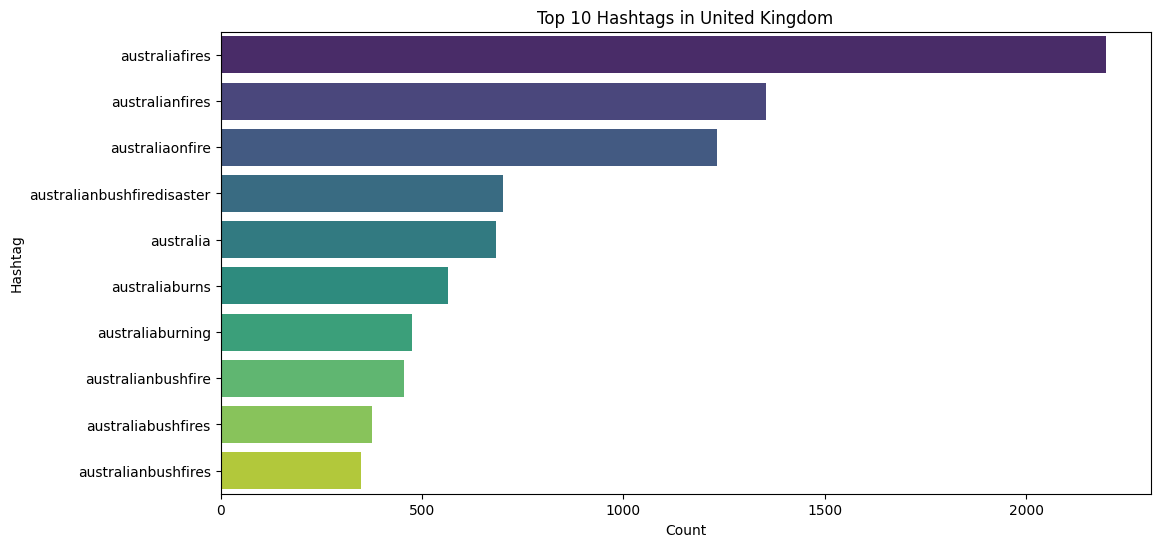

C:\Users\20529\AppData\Local\Temp\ipykernel_29556\4240941510.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Hashtag', data=hashtag_df, palette='viridis')


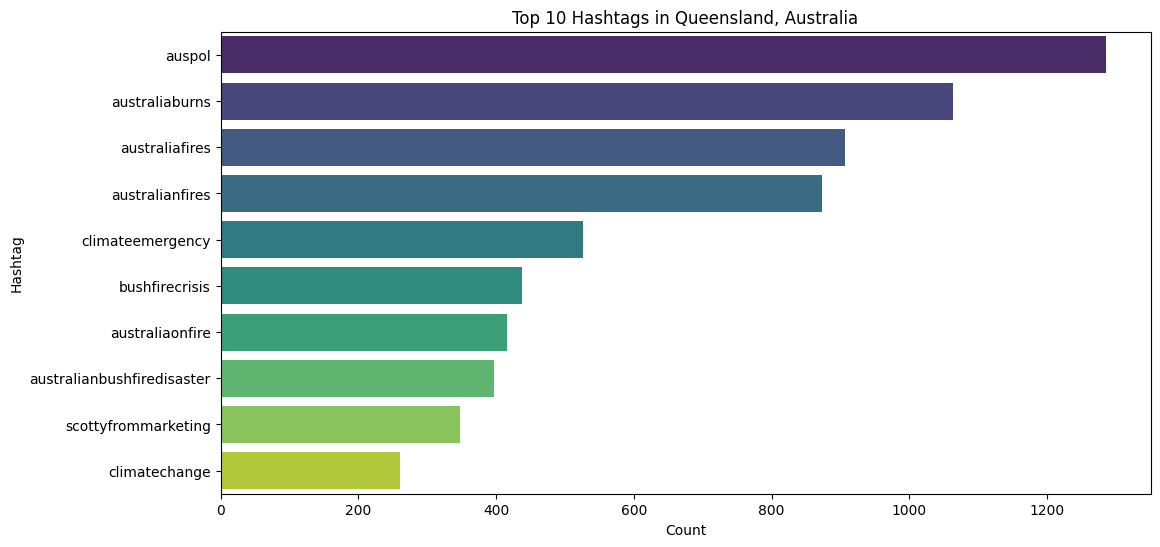

C:\Users\20529\AppData\Local\Temp\ipykernel_29556\4240941510.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Hashtag', data=hashtag_df, palette='viridis')


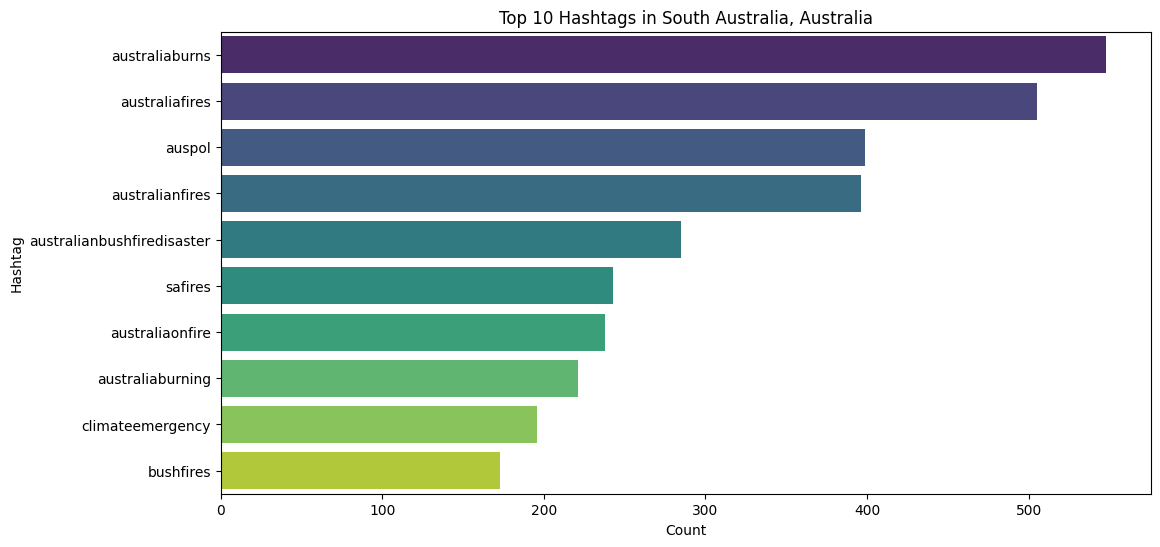

C:\Users\20529\AppData\Local\Temp\ipykernel_29556\4240941510.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Hashtag', data=hashtag_df, palette='viridis')


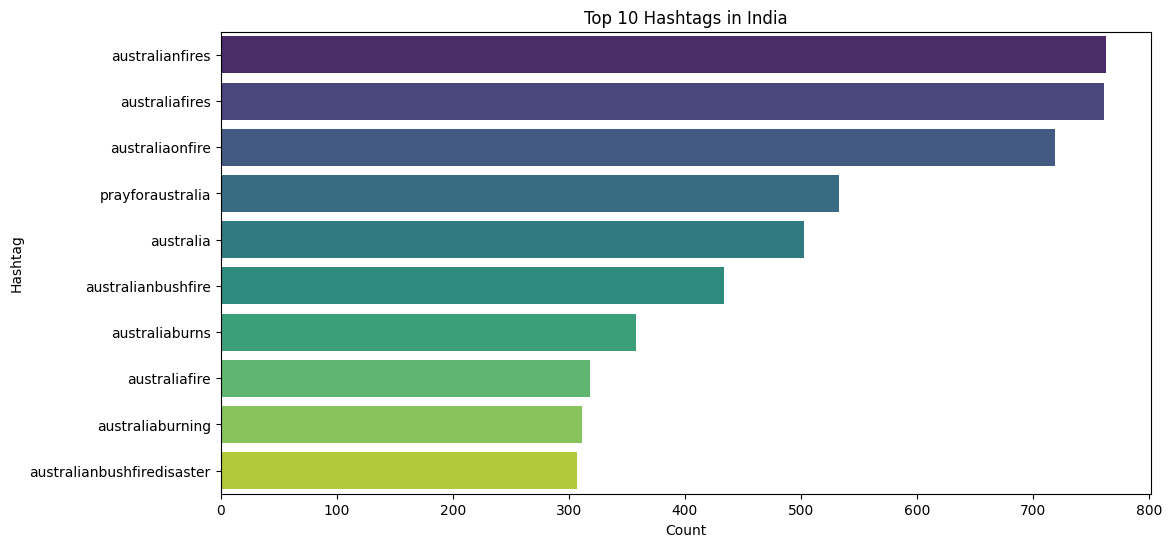

C:\Users\20529\AppData\Local\Temp\ipykernel_29556\4240941510.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Hashtag', data=hashtag_df, palette='viridis')


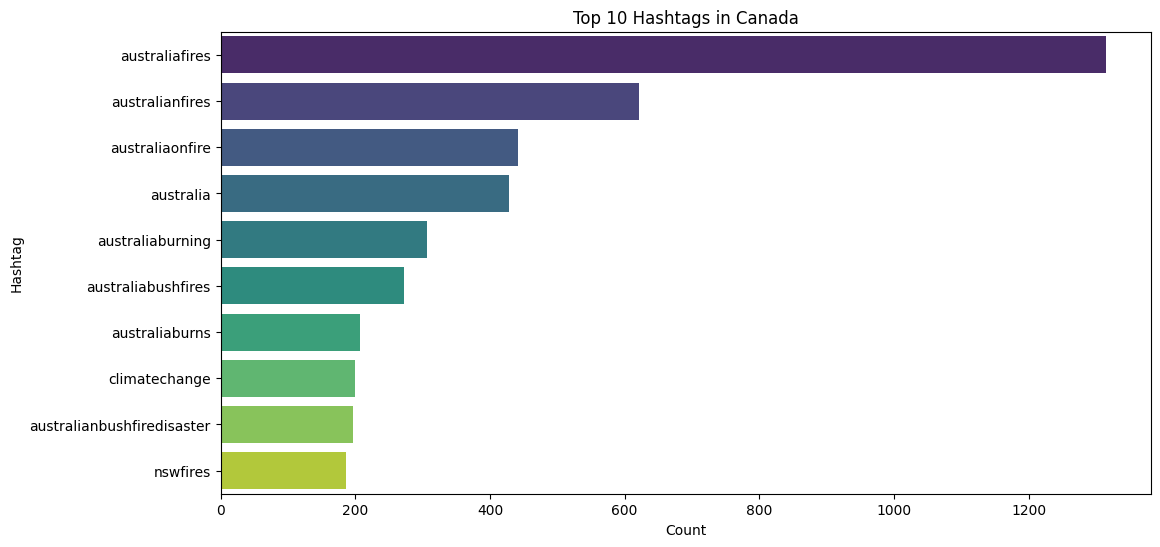

In [41]:
# 7. 与hashtag相关的统计

from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 过滤出推文数量最多的前10个地区
top_locations = df['location'].value_counts().index[:10]
top_location_df = df[df['location'].isin(top_locations)]

# 展开hashtags的列表，并将它们与位置组合
top_location_df = top_location_df.dropna(subset=['hashtags'])  # 去除没有 hashtags 的行
top_location_df['hashtags'] = top_location_df['hashtags'].apply(eval)

# 统计每个位置的hashtag频率
location_hashtag_counts = {}
for location in top_locations:
    location_data = top_location_df[top_location_df['location'] == location]
    hashtags = location_data['hashtags'].sum()  # 将所有hashtags展开为一个列表
    hashtag_counter = Counter(hashtags)
    location_hashtag_counts[location] = hashtag_counter

# 可视化 - 每个位置的热门hashtag
for location, counter in location_hashtag_counts.items():
    top_hashtags = counter.most_common(10)  # 选取前10个最常用的hashtags
    hashtag_df = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Count'])
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Count', y='Hashtag', data=hashtag_df, palette='viridis')
    plt.title(f'Top 10 Hashtags in {location}')
    plt.show()
